<a href="https://colab.research.google.com/github/prashver/Stock-Price-Prediction/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nestle India Stock Price Prediction**

NESTLÉ India is a subsidiary of NESTLÉ S.A. of Switzerland. With eight factories and a large number of co-packers, Nestlé India is a vibrant Company that provides consumers in India with products of global standards and is committed to long-term sustainable growth and shareholder satisfaction.

Here, we are going to predict the future stock price of the company using Recurrent Neural Networks on the basis of historical stock data provided.

## Part 1 - Data Preprocessing

### Importing the libraries


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Importing the training set

In [25]:
train_df = pd.read_csv('Nestle_India_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1455 non-null   object
 1   Open    1455 non-null   object
 2   High    1455 non-null   object
 3   Low     1455 non-null   object
 4   Close   1455 non-null   object
 5   Volume  1455 non-null   object
dtypes: object(6)
memory usage: 68.3+ KB


Here the data type of columns we are going to be used for prediction are having data type as object. So in order to make them of use, we need to convert them into float data type.

In [26]:
train_df['Open'] = train_df['Open'].str.replace(',','').astype(np.float64)
train_df['High'] = train_df['High'].str.replace(',','').astype(np.float64)
train_df['Low'] = train_df['Low'].str.replace(',','').astype(np.float64)
train_df['Close'] = train_df['Close'].str.replace(',','').astype(np.float64)
train_df['Volume'] = train_df['Volume'].str.replace(',','').astype(np.float64)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1455 non-null   object 
 1   Open    1455 non-null   float64
 2   High    1455 non-null   float64
 3   Low     1455 non-null   float64
 4   Close   1455 non-null   float64
 5   Volume  1455 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.3+ KB


In [28]:
training_set = train_df.iloc[:, 1:2].values
training_set

array([[ 6209.],
       [ 6162.],
       [ 6092.],
       ...,
       [17340.],
       [17646.],
       [17849.]])

###Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

###Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []

for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

###Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Part 2 - Building the RNN

###Importing the libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

###Initialising the RNN

In [10]:
regressor = Sequential()

###Adding the LSTM Layers

In [11]:
#first layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

###Adding Output layer

In [12]:
regressor.add(Dense(units = 1))

###Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
44/44 [==============================] - 18s 199ms/step - loss: 0.0319
Epoch 2/100
44/44 [==============================] - 8s 179ms/step - loss: 0.0049
Epoch 3/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0052
Epoch 4/100
44/44 [==============================] - 4s 99ms/step - loss: 0.0053
Epoch 5/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0052
Epoch 6/100
44/44 [==============================] - 4s 97ms/step - loss: 0.0044
Epoch 7/100
44/44 [==============================] - 4s 100ms/step - loss: 0.0041
Epoch 8/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0034
Epoch 9/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0041
Epoch 10/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0036
Epoch 11/100
44/44 [==============================] - 4s 97ms/step - loss: 0.0039
Epoch 12/100
44/44 [==============================] - 4s 98ms/step - loss: 0.0038
Epoch 13/100
44/44 [=

##Making the predictions and visualizing the results

###Getting the real stock price of months April and May 2022

In [29]:
test_df = pd.read_csv('Nestle_India_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    30 non-null     object
 1   Open    30 non-null     object
 2   High    30 non-null     object
 3   Low     30 non-null     object
 4   Close   30 non-null     object
 5   Volume  30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [30]:
test_df['Open'] = test_df['Open'].str.replace(',','').astype(np.float64)
test_df['High'] = test_df['High'].str.replace(',','').astype(np.float64)
test_df['Low'] = test_df['Low'].str.replace(',','').astype(np.float64)
test_df['Close'] = test_df['Close'].str.replace(',','').astype(np.float64)
test_df['Volume'] = test_df['Volume'].str.replace(',','').astype(np.float64)

In [31]:
real_stock_price = test_df.iloc[:, 1:2].values

###Getting the predicted stock price

In [32]:
dataset_total = pd.concat((train_df['Open'], test_df['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

###Visualizing the results

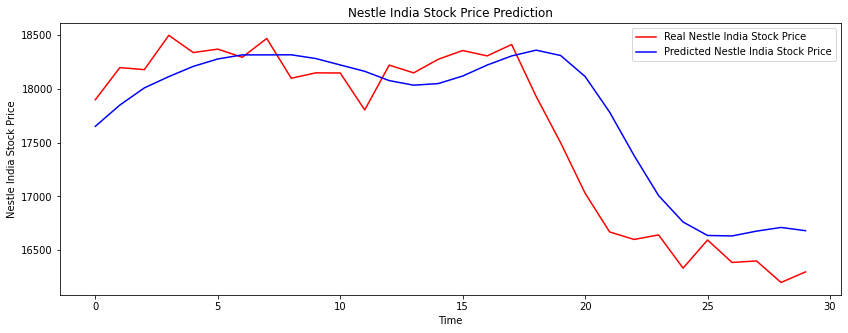

In [33]:
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color = 'red', label = 'Real Nestle India Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Nestle India Stock Price')
plt.title('Nestle India Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nestle India Stock Price')
plt.legend()
plt.show()